<a href="https://colab.research.google.com/github/J-N-ch/RL_MAZE_Policy_Gradient/blob/master/RL_maze_Policy_Grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Modification from "https://github.com/YutaroOgawa/Deep-Reinforcement-Learning-Book/blob/master/program/2_2_maze_random.ipynb"
'''

 Add Using Policy Gradient !!!

'''

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

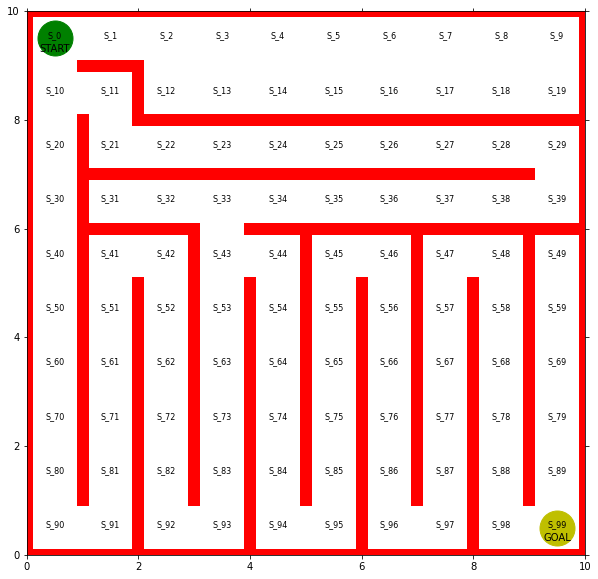

In [7]:
# Initialize State of Maze

# Set the size of the Graph
fig = plt.figure( figsize=(10, 10) )
ax  = plt.gca()

# Draw the Red Wall
# [x1, y1] ---> [x2, y2]
#plt.plot([x1, x2], [y1, y2], color='red', linewidth=2)
lwd=12
plt.plot([  0, 0 ], [  0, 10 ], color='red', linewidth=lwd)
plt.plot([  0,10 ], [ 10, 10 ], color='red', linewidth=lwd)
plt.plot([ 10,10 ], [ 10,  0 ], color='red', linewidth=lwd)
plt.plot([ 10, 0 ], [  0,  0 ], color='red', linewidth=lwd)

plt.plot([1, 1    ], [ 1,     1 + 7], color='red', linewidth=lwd)
plt.plot([1, 2    ], [ 2 + 7, 2 + 7], color='red', linewidth=lwd)
plt.plot([2, 2    ], [ 2 + 7, 1 + 7], color='red', linewidth=lwd)
plt.plot([2, 3 + 7], [ 1 + 7, 1 + 7], color='red', linewidth=lwd)
plt.plot([1, 3    ], [-1 + 7,-1 + 7], color='red', linewidth=lwd)
plt.plot([4, 10   ], [-1 + 7,-1 + 7], color='red', linewidth=lwd)
plt.plot([1, 9    ], [ 0 + 7, 0 + 7], color='red', linewidth=lwd)
plt.plot([2, 2    ], [ 0,    -2 + 7], color='red', linewidth=lwd)
plt.plot([3, 3    ], [ 1,    -1 + 7], color='red', linewidth=lwd)
plt.plot([4, 4    ], [ 0,    -2 + 7], color='red', linewidth=lwd)
plt.plot([5, 5    ], [ 1,    -1 + 7], color='red', linewidth=lwd)
plt.plot([6, 6    ], [ 0,    -2 + 7], color='red', linewidth=lwd)
plt.plot([7, 7    ], [ 1,    -1 + 7], color='red', linewidth=lwd)
plt.plot([8, 8    ], [ 0,    -2 + 7], color='red', linewidth=lwd)
plt.plot([9, 9    ], [ 1,    -1 + 7], color='red', linewidth=lwd)



# Draw the text to represent state of agent in the maze
def plot_fun(i,j):
    plt.text(i+0.5, (9-j)+0.5, 'S_{}'.format(i + j*10), size=8, ha='center')

[[plot_fun(i,j) for i in range(10)] for j in range(10)]

# Set the range of the graph
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.tick_params(axis='both',
                which='both',
                bottom='off',
                top='off',
                labelbottom='off',
                right='off',
                left='off',
                labelleft='off',
                )

# Draw it!
start_x, start_y = [1 - 0.5, 10 - 0.5]
plt.text(start_x, start_y - 0.25, 'START', ha='center')
plt.text(start_y, start_x - 0.25,  'GOAL', ha='center')
line, =ax.plot([start_x], [start_y], marker="o", color='g', markersize=35)
line, =ax.plot([start_y], [start_x], marker="o", color='y', markersize=35)


In [9]:
# Set the Strategy parameters theta_0 (The Strategy Table)
N = np.nan
#                 up, right, down, left
theta_0_row9 = np.array([
                    [ N, 1, 1, N],# S_0
                    [ N, 1, N, 1],# S_1
                    [ N, 1, 1, 1],# S_2
                    [ N, 1, 1, 1],# S_3
                    [ N, 1, 1, 1],# S_4
                    [ N, 1, 1, 1],# S_5
                    [ N, 1, 1, 1],# S_6
                    [ N, 1, 1, 1],# S_7
                    [ N, 1, 1, 1],# S_8
                    [ N, N, 1, 1],# S_9
                   ])

theta_0_row8 = np.array([
                    [ 1, 1, 1, N],# S_10
                    [ N, N, 1, 1],# S_11
                    [ 1, 1, N, N],# S_12
                    [ 1, 1, N, 1],# S_13
                    [ 1, 1, N, 1],# S_14
                    [ 1, 1, N, 1],# S_15
                    [ 1, 1, N, 1],# S_16
                    [ 1, 1, N, 1],# S_17
                    [ 1, 1, N, 1],# S_18
                    [ 1, N, N, 1],# S_19
                   ])

theta_0_row7 = np.array([
                    [ 1, N, 1, N],# S_20
                    [ 1, 1, N, N],# S_21
                    [ N, 1, N, 1],# S_22
                    [ N, 1, N, 1],# S_23
                    [ N, 1, N, 1],# S_24
                    [ N, 1, N, 1],# S_25
                    [ N, 1, N, 1],# S_26
                    [ N, 1, N, 1],# S_27
                    [ N, 1, N, 1],# S_28
                    [ N, N, 1, 1],# S_29
                   ])

theta_0_row6 = np.array([
                    [ 1, N, 1, N],# S_30
                    [ N, 1, N, N],# S_31
                    [ N, 1, N, 1],# S_32
                    [ N, 1, 1, 1],# S_33
                    [ N, 1, N, 1],# S_34
                    [ N, 1, N, 1],# S_35
                    [ N, 1, N, 1],# S_36
                    [ N, 1, N, 1],# S_37
                    [ N, 1, N, 1],# S_38
                    [ 1, N, N, 1],# S_39
                   ])

theta_0_row5 = np.array([
                    [ 1, N, 1, N],# S_40
                    [ N, 1, 1, N],# S_41
                    [ N, N, 1, 1],# S_42
                    [ 1, 1, 1, N],# S_43
                    [ N, N, 1, 1],# S_44
                    [ N, 1, 1, N],# S_45
                    [ N, N, 1, 1],# S_46
                    [ N, 1, 1, N],# S_47
                    [ N, N, 1, 1],# S_48
                    [ N, N, 1, N],# S_49
                   ])

theta_0_row4 = np.array([
                    [ 1, N, 1, N],# S_50
                    [ 1, N, 1, N],# S_51
                    [ 1, N, 1, N],# S_52
                    [ 1, N, 1, N],# S_53
                    [ 1, N, 1, N],# S_54
                    [ 1, N, 1, N],# S_55
                    [ 1, N, 1, N],# S_56
                    [ 1, N, 1, N],# S_57
                    [ 1, N, 1, N],# S_58
                    [ 1, N, 1, N],# S_59
                   ])

theta_0_row3 = np.array([
                    [ 1, N, 1, N],# S_60
                    [ 1, N, 1, N],# S_61
                    [ 1, N, 1, N],# S_62
                    [ 1, N, 1, N],# S_63
                    [ 1, N, 1, N],# S_64
                    [ 1, N, 1, N],# S_65
                    [ 1, N, 1, N],# S_66
                    [ 1, N, 1, N],# S_67
                    [ 1, N, 1, N],# S_68
                    [ 1, N, 1, N],# S_69
                   ])

theta_0_row2 = np.array([
                    [ 1, N, 1, N],# S_70
                    [ 1, N, 1, N],# S_71
                    [ 1, N, 1, N],# S_72
                    [ 1, N, 1, N],# S_73
                    [ 1, N, 1, N],# S_74
                    [ 1, N, 1, N],# S_75
                    [ 1, N, 1, N],# S_76
                    [ 1, N, 1, N],# S_77
                    [ 1, N, 1, N],# S_78
                    [ 1, N, 1, N],# S_79
                   ])

theta_0_row1 = np.array([
                    [ 1, N, 1, N],# S_80
                    [ 1, N, 1, N],# S_81
                    [ 1, N, 1, N],# S_82
                    [ 1, N, 1, N],# S_83
                    [ 1, N, 1, N],# S_84
                    [ 1, N, 1, N],# S_85
                    [ 1, N, 1, N],# S_86
                    [ 1, N, 1, N],# S_87
                    [ 1, N, 1, N],# S_88
                    [ 1, N, 1, N],# S_89
                   ])

theta_0_row0 = np.array([
                    [ 1, 1, N, N],# S_90
                    [ 1, N, N, 1],# S_91
                    [ 1, 1, N, N],# S_92
                    [ 1, N, N, 1],# S_93
                    [ 1, 1, N, N],# S_94
                    [ 1, N, N, 1],# S_95
                    [ 1, 1, N, N],# S_96
                    [ 1, N, N, 1],# S_97
                    [ 1, 1, N, N],# S_98
                    [ 1, N, N, 1],# S_99
                   ])

theta_0 = np.concatenate([
                    theta_0_row9,
                    theta_0_row8,
                    theta_0_row7,
                    theta_0_row6,
                    theta_0_row5,
                    theta_0_row4,
                    theta_0_row3,
                    theta_0_row2,
                    theta_0_row1,
                    theta_0_row0,
                   ])

#theta_0

In [15]:
def softmax_convert_into_pi_from_theta(theta):
    # Using Softmax function to calculate the percentage

    beta = 1.0 
    [m, n] = theta.shape
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)

    for i in range(0, m):

        # The straight-forward way of calculating percentage
        #pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

        # The softmax          way of calculating percentage
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])

    pi = np.nan_to_num(pi)

    return pi
      

In [16]:
#pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0 = softmax_convert_into_pi_from_theta(theta_0)

#pi_0

In [17]:
# Get Next Stage

def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    # Choose the direction according to the probability of pi[s,:]
    next_direction = np.random.choice(direction, p=pi[s,:])

    if   next_direction == "up":
        action = 0
        s_next = s - 10
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 10
    elif next_direction == "left":
        action = 3
        s_next = s - 1

    return [action, s_next]


In [20]:
def goal_maze_return_s_and_action(pi):
    s = 0 # At the starting point
    state_and_action_history = [[0, np.nan]]

    while True:
        [action, next_s] = get_action_and_next_s(pi, s)
        state_and_action_history[-1][1] = action

        state_and_action_history.append([next_s, np.nan])

        if next_s == 99:
            break
        else:
            s = next_s

    return state_and_action_history
 

In [36]:

state_and_action_history = goal_maze_return_s_and_action(pi_0)
print("The total steps used to finish the maze is " + str(len(state_and_action_history)-1))


The total steps used to finish the maze is 5566


In [37]:
state_and_action_history_cutted = state_and_action_history.copy()
print(state_and_action_history_cutted)

[[0, 1], [1, 1], [2, 2], [12, 0], [2, 1], [3, 3], [2, 2], [12, 1], [13, 3], [12, 0], [2, 2], [12, 0], [2, 2], [12, 0], [2, 1], [3, 2], [13, 3], [12, 0], [2, 1], [3, 2], [13, 3], [12, 1], [13, 3], [12, 1], [13, 3], [12, 0], [2, 1], [3, 3], [2, 2], [12, 0], [2, 1], [3, 3], [2, 1], [3, 3], [2, 3], [1, 1], [2, 1], [3, 2], [13, 0], [3, 3], [2, 2], [12, 1], [13, 3], [12, 1], [13, 0], [3, 1], [4, 2], [14, 0], [4, 2], [14, 3], [13, 0], [3, 1], [4, 2], [14, 0], [4, 3], [3, 1], [4, 3], [3, 2], [13, 0], [3, 3], [2, 1], [3, 2], [13, 3], [12, 1], [13, 1], [14, 0], [4, 2], [14, 0], [4, 3], [3, 2], [13, 3], [12, 1], [13, 1], [14, 0], [4, 1], [5, 1], [6, 3], [5, 2], [15, 1], [16, 1], [17, 1], [18, 3], [17, 1], [18, 1], [19, 3], [18, 1], [19, 3], [18, 3], [17, 3], [16, 0], [6, 1], [7, 1], [8, 1], [9, 2], [19, 0], [9, 2], [19, 3], [18, 0], [8, 2], [18, 0], [8, 3], [7, 2], [17, 0], [7, 2], [17, 3], [16, 3], [15, 1], [16, 3], [15, 0], [5, 2], [15, 1], [16, 3], [15, 0], [5, 1], [6, 2], [16, 1], [17, 0], [7

In [38]:
# Define the Update function of theta parameter
def update_theta(theta, pi, s_a_history):
    eta = 0.1 # learning rate defined
    T = len(state_and_action_history) - 1 
    # the total number of steps to reach the goal

    [m, n] = theta.shape
    delta_theta = theta.copy()

    # Calculate delta_theta for each elements
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):
                
                SA_i = [ SA for SA in state_and_action_history if SA[0] == i ]
                
                SA_ij = [ SA for SA in state_and_action_history if SA == [i, j]]

                N_i = len(SA_i)
                N_ij = len(SA_ij)

                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [39]:
new_theta = update_theta(theta_0, pi_0, state_and_action_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.50002246 0.49997754 0.        ]
 [0.         0.50004492 0.         0.49995508]
 [0.         0.33335728 0.33342915 0.33321357]
 [0.         0.33331537 0.33335729 0.33332734]
 [0.         0.33332136 0.33330938 0.33336927]
 [0.         0.33336328 0.3332974  0.33333932]
 [0.         0.3333533  0.33331137 0.33333533]
 [0.         0.33330139 0.33335529 0.33334331]
 [0.         0.33331537 0.33331537 0.33336927]
 [0.         0.         0.49997754 0.50002246]
 [0.33333134 0.33330738 0.33336128 0.        ]
 [0.         0.         0.50000898 0.49999102]
 [0.49992814 0.50007186 0.         0.        ]
 [0.33334731 0.33329341 0.         0.33335928]
 [0.33341518 0.33332534 0.         0.33325947]
 [0.33341918 0.33326945 0.         0.33331137]
 [0.33330938 0.33332136 0.         0.33336927]
 [0.33333533 0.33332934 0.         0.33333533]
 [0.33332934 0.33331736 0.         0.3333533 ]
 [0.49995958 0.         0.         0.50004042]
 [0.49995958 0.         0.50004042 0.        ]
 [0.50006288 

In [ ]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
import matplotlib
from matplotlib import animation, rc
matplotlib.rcParams['animation.embed_limit'] = 2**128

from IPython.display import HTML


def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''フレームごとの描画内容'''
    state = state_history_cutted[i]  # 現在の場所を描く
    x = (state % 10) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 9.5 - int(state / 10)  # y座標は3で割った商を9.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

#HTML(anim.to_jshtml())
rc('animation', html='jshtml')
anim